In [ ]:
''' Perform sentiment analysis of amazon product reviews 
    to assess consumer satisfaction across different product categories
    
    Using amazon_reviews.csv file in folder
'''

In [54]:
# Insert necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
!pip3 install textblob
from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bryc1_20\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bryc1_20\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bryc1_20\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bryc1_20\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [2]:
# Get csv file and load it into a variable
data = pd.read_csv("amazon_reviews.csv")
print(data.shape)
data.head(15)


(21000, 9)


,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...
5,6,__label1__,3,N,Health & Personal Care,B00686HNUK,Tobacco Pipe Stand - Fold-away Portable - Ligh...,not sure,I'm not sure what this is supposed to be but I...
6,7,__label1__,4,N,Toys,B00NUG865W,ESPN 2-Piece Table Tennis,PING PONG TABLE GREAT FOR YOUTHS AND FAMILY,Pleased with ping pong table. 11 year old and ...
7,8,__label1__,4,Y,Beauty,B00QUL8VX6,Abundant Health 25% Vitamin C Serum with Vitam...,Great vitamin C serum,Great vitamin C serum... I really like the oil...
8,9,__label1__,4,N,Health & Personal Care,B004YHKVCM,PODS Spring Meadow HE Turbo Laundry Detergent ...,wonderful detergent.,I've used tide pods laundry detergent for many...
9,10,__label1__,1,N,Health & Personal Care,B00H4IBD0M,"Sheer TEST, Best Testosterone Booster Suppleme...",WARNING: do not waste your money on this,Everybody wants to fall for their promises. Bu...


In [66]:
# Drop unnecessary columns
df = data.drop(["VERIFIED_PURCHASE", "PRODUCT_ID"], 1)
# find any null values or duplicated
print("Null values... \n", df.isnull().sum())
print("Duplicates: ", df.duplicated("REVIEW_TEXT").sum())

Null values... 
 DOC_ID              0
LABEL               0
RATING              0
PRODUCT_CATEGORY    0
PRODUCT_TITLE       0
REVIEW_TITLE        0
REVIEW_TEXT         0
dtype: int64
Duplicates:  0


In [68]:
# Tokenize review - split into words
# Only keep verbs, adverbs and adjectives - this is based on tag

# Convert to lower case for string matching for stopwords
df["REVIEW_TEXT"] = df["REVIEW_TEXT"].apply(lambda x: x.lower())

# Remove punctuation
df["REVIEW_TEXT"] = df["REVIEW_TEXT"].str.replace(r'[^\w\s]+', '')

# Lemmatize lower case text
lemmatizer = WordNetLemmatizer()
def lemmatize_t(text):
    lemd = []
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    lemd.append(lemmatized_output)

    return(' '.join(lemd))

df["LEM"] = df["REVIEW_TEXT"].apply(lemmatize_t)


# Remove_words function to get rid of stopwords and reduce to verbs, adverbs and adjectives
def remove_words(text):
    token = nltk.tokenize.word_tokenize(text)
    stop_words = stopwords.words('english')
    result = []
    
    for i in nltk.pos_tag(token):
        if i[1].startswith('JJ') | i[1].startswith('RB') | i[1].startswith('VB'):
            if i[0] not in stop_words:
                result.append(i[0])
            
    return(' '.join(result))

# final review is only words that influence sentiment
df["S_WORDS"] = df["LEM"].apply(remove_words)
df.head(15)

<ipython-input-68-77956fe31a83>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df["REVIEW_TEXT"] = df["REVIEW_TEXT"].str.replace(r'[^\w\s]+', '')


,DOC_ID,LABEL,RATING,PRODUCT_CATEGORY,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,LEM,S_WORDS
0,1,__label1__,4,PC,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,when least you think so this product will save...,when least you think so this product will save...,least think save keep around need
1,2,__label1__,4,Wireless,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,lithium batteries are something new introduced...,lithium battery are something new introduced i...,new introduced average developing relatively h...
2,3,__label1__,3,Baby,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,i purchased this swing for my baby she is 6 mo...,i purchased this swing for my baby she is 6 mo...,purchased ha pretty much loud doesnt well beau...
3,4,__label1__,4,Office Products,Casio MS-80B Standard Function Desktop Calculator,Great computing!,i was looking for an inexpensive desk calcolat...,i wa looking for an inexpensive desk calcolatu...,wa looking inexpensive doe need tilt slightly ...
4,5,__label1__,4,Beauty,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,i only use it twice a week and the results are...,i only use it twice a week and the result are ...,use twice great used teeth whitening use least...
5,6,__label1__,3,Health & Personal Care,Tobacco Pipe Stand - Fold-away Portable - Ligh...,not sure,im not sure what this is supposed to be but i ...,im not sure what this is supposed to be but i ...,sure supposed recommend little using plan givi...
6,7,__label1__,4,Toys,ESPN 2-Piece Table Tennis,PING PONG TABLE GREAT FOR YOUTHS AND FAMILY,pleased with ping pong table 11 year old and 1...,pleased with ping pong table 11 year old and 1...,pleased ping pong old old better sitting video...
7,8,__label1__,4,Beauty,Abundant Health 25% Vitamin C Serum with Vitam...,Great vitamin C serum,great vitamin c serum i really like the oil fe...,great vitamin c serum i really like the oil fe...,great really sticky used last recent help heal...
8,9,__label1__,4,Health & Personal Care,PODS Spring Meadow HE Turbo Laundry Detergent ...,wonderful detergent.,ive used tide pods laundry detergent for many ...,ive used tide pod laundry detergent for many y...,used tide pod laundry many great use nice leav...
9,10,__label1__,1,Health & Personal Care,"Sheer TEST, Best Testosterone Booster Suppleme...",WARNING: do not waste your money on this,everybody wants to fall for their promises but...,everybody want to fall for their promise but t...,want fall relatively unheard even say existant...


In [71]:
# Convert S_WORDS column into text blobs for sentiment polarity scoring
r_blobs = df["S_WORDS"].apply(lambda x: TextBlob(x))

r_polarity = [blob.polarity for blob in r_blobs]
df["MEAN_POLARITY"] = r_polarity
df.head(20)

,DOC_ID,LABEL,RATING,PRODUCT_CATEGORY,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,LEM,S_WORDS,colours,MEAN_POLARITY
0,1,__label1__,4,PC,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,when least you think so this product will save...,when least you think so this product will save...,least think save keep around need,75,-0.300000
1,2,__label1__,4,Wireless,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,lithium batteries are something new introduced...,lithium battery are something new introduced i...,new introduced average developing relatively h...,75,0.219226
2,3,__label1__,3,Baby,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,i purchased this swing for my baby she is 6 mo...,i purchased this swing for my baby she is 6 mo...,purchased ha pretty much loud doesnt well beau...,50,0.425000
3,4,__label1__,4,Office Products,Casio MS-80B Standard Function Desktop Calculator,Great computing!,i was looking for an inexpensive desk calcolat...,i wa looking for an inexpensive desk calcolatu...,wa looking inexpensive doe need tilt slightly ...,75,-0.088542
4,5,__label1__,4,Beauty,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,i only use it twice a week and the results are...,i only use it twice a week and the result are ...,use twice great used teeth whitening use least...,75,0.250000
5,6,__label1__,3,Health & Personal Care,Tobacco Pipe Stand - Fold-away Portable - Ligh...,not sure,im not sure what this is supposed to be but i ...,im not sure what this is supposed to be but i ...,sure supposed recommend little using plan givi...,50,0.156250
6,7,__label1__,4,Toys,ESPN 2-Piece Table Tennis,PING PONG TABLE GREAT FOR YOUTHS AND FAMILY,pleased with ping pong table 11 year old and 1...,pleased with ping pong table 11 year old and 1...,pleased ping pong old old better sitting video...,75,0.300000
7,8,__label1__,4,Beauty,Abundant Health 25% Vitamin C Serum with Vitam...,Great vitamin C serum,great vitamin c serum i really like the oil fe...,great vitamin c serum i really like the oil fe...,great really sticky used last recent help heal...,75,0.230000
8,9,__label1__,4,Health & Personal Care,PODS Spring Meadow HE Turbo Laundry Detergent ...,wonderful detergent.,ive used tide pods laundry detergent for many ...,ive used tide pod laundry detergent for many y...,used tide pod laundry many great use nice leav...,75,0.550000
9,10,__label1__,1,Health & Personal Care,"Sheer TEST, Best Testosterone Booster Suppleme...",WARNING: do not waste your money on this,everybody wants to fall for their promises but...,everybody want to fall for their promise but t...,want fall relatively unheard even say existant...,0,-0.175000


In [69]:
categories = list(df["PRODUCT_CATEGORY"].unique())
print(categories)

['PC', 'Wireless', 'Baby', 'Office Products', 'Beauty', 'Health & Personal Care', 'Toys', 'Kitchen', 'Furniture', 'Electronics', 'Camera', 'Sports', 'Home', 'Jewelry', 'Books', 'Grocery', 'Video DVD', 'Tools', 'Home Improvement', 'Shoes', 'Outdoors', 'Luggage', 'Video Games', 'Apparel', 'Lawn and Garden', 'Pet Products', 'Home Entertainment', 'Musical Instruments', 'Watches', 'Automotive']


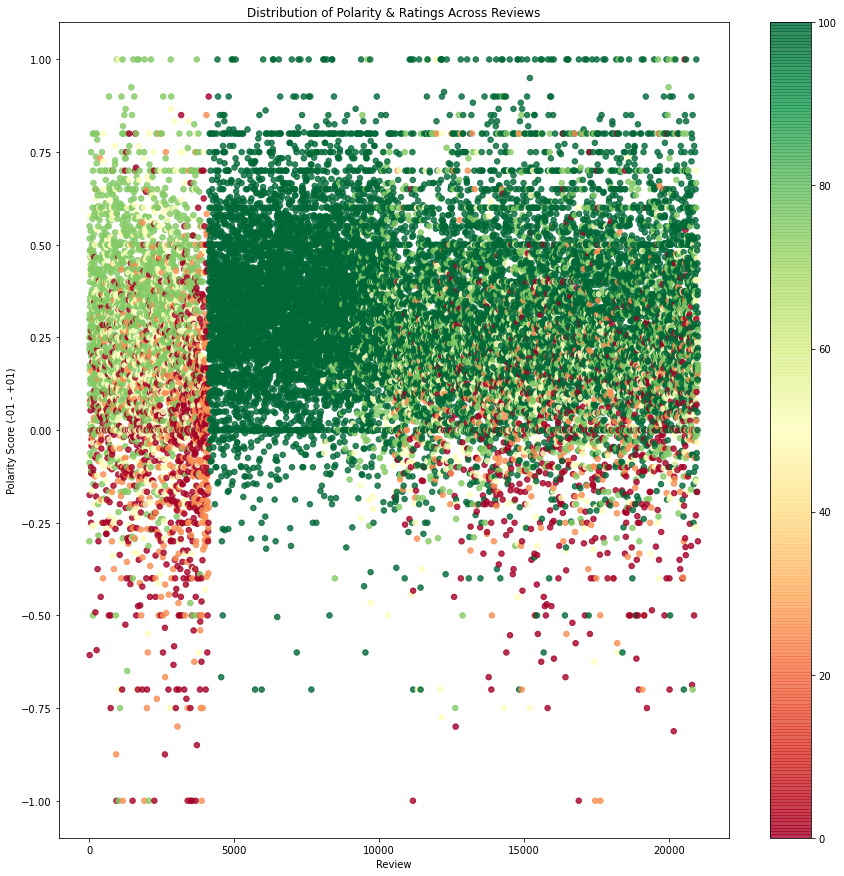

In [72]:
# Create conditions for marker colouring 
# Create scatter plot to show polarity of reviews and colours for ratings
# Expected : green higher, red low, little mixing between polaritys
conditions = [
    (df['RATING'] == 1),
    (df['RATING'] == 2),
    (df['RATING'] == 3),
    (df['RATING'] == 4),
    (df['RATING'] == 5)
    ]
c = [0, 25, 50, 75, 100]

df['colours'] = np.select(conditions, c)

plt.scatter(df["DOC_ID"],df["MEAN_POLARITY"],s=30, c = df["colours"], cmap='RdYlGn', alpha = 0.8)
plt.gcf().set_size_inches((15, 15))
plt.colorbar()
plt.title("Distribution of Polarity & Ratings Across Reviews")
plt.xlabel("Review")
plt.ylabel("Polarity Score (-01 - +01)")
plt.show()

['PC', 'Wireless', 'Baby', 'Office Products', 'Beauty', 'Health & Personal Care', 'Toys', 'Kitchen', 'Furniture', 'Electronics', 'Camera', 'Sports', 'Home', 'Jewelry', 'Books', 'Grocery', 'Video DVD', 'Tools', 'Home Improvement', 'Shoes', 'Outdoors', 'Luggage', 'Video Games', 'Apparel', 'Lawn and Garden', 'Pet Products', 'Home Entertainment', 'Musical Instruments', 'Watches', 'Automotive']


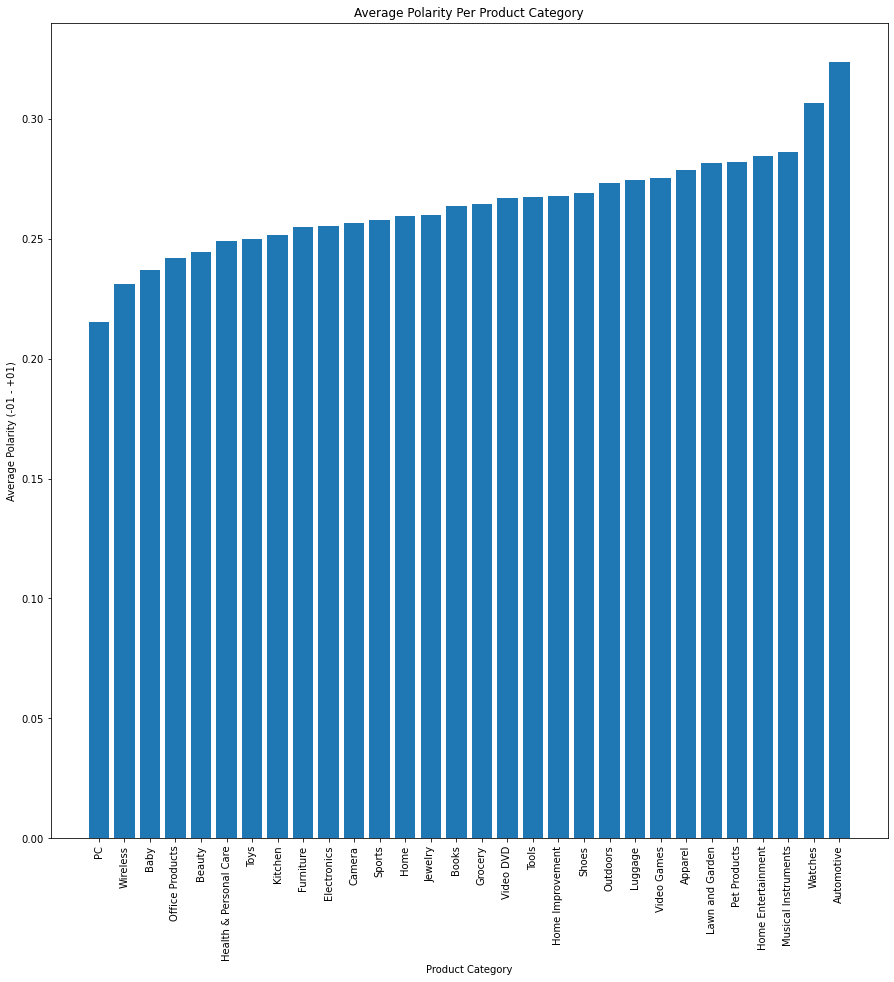

In [73]:
import matplotlib.cm as cm

# Bar chart for average polarity per product category
categories = list(df["PRODUCT_CATEGORY"].unique())


print(categories)
mean_ps = df.groupby("PRODUCT_CATEGORY", as_index=False)["MEAN_POLARITY"].mean()
mean_ps = mean_ps.sort_values("MEAN_POLARITY")

    
plt.bar(categories, mean_ps["MEAN_POLARITY"])    

# Format bar chart
plt.gcf().set_size_inches((15, 15))
plt.xticks(rotation='vertical')
plt.title("Average Polarity Per Product Category")
plt.ylabel("Average Polarity (-01 - +01)")
plt.xlabel("Product Category")
plt.show()

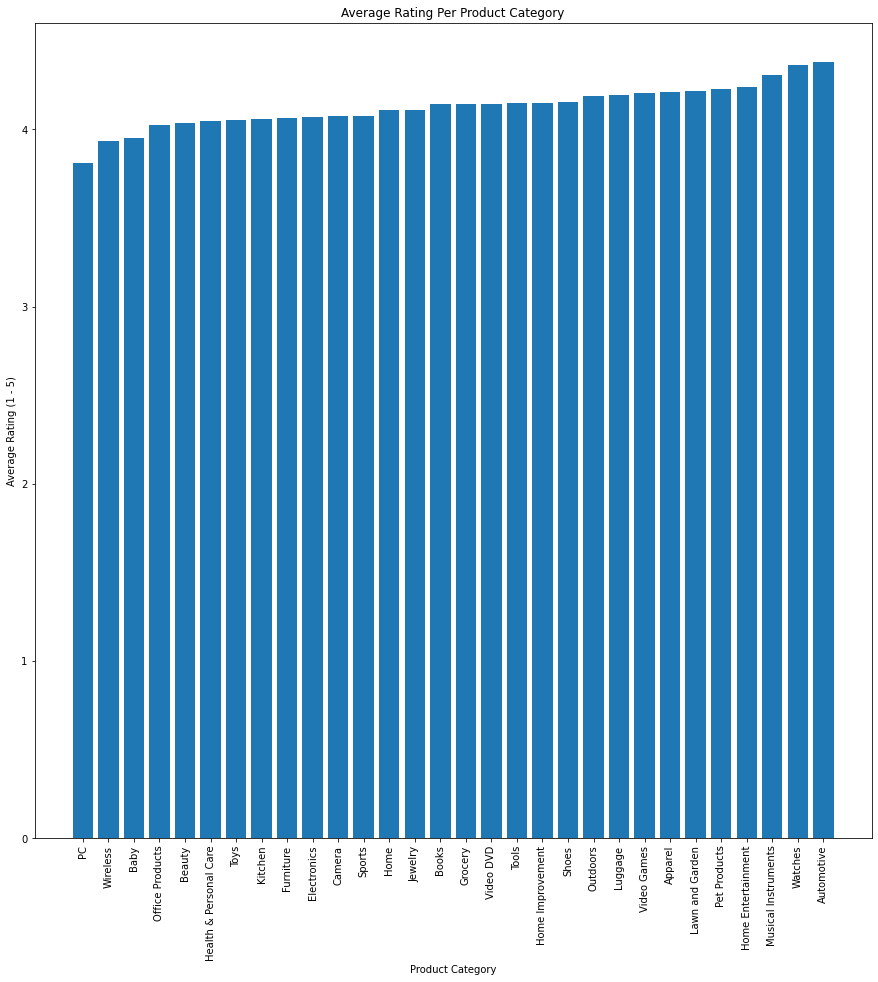

In [74]:
# Bar chart for average rating per product category
mean_r = df.groupby("PRODUCT_CATEGORY", as_index=False)["RATING"].mean()
mean_r = mean_r.sort_values("RATING")

    
plt.bar(categories, mean_r["RATING"])    

# Format bar chart
plt.gcf().set_size_inches((15, 15))
plt.xticks(rotation='vertical')
plt.title("Average Rating Per Product Category")
plt.ylabel("Average Rating (1 - 5)")
plt.xlabel("Product Category")
plt.show()

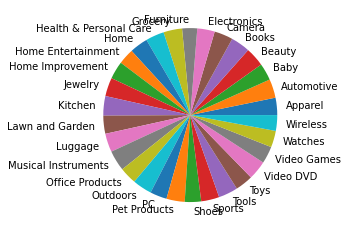

In [75]:
# Pie chart for product category distribution of ratings 5
four_plus = df[df.RATING == 5]
four_plus = four_plus.groupby("PRODUCT_CATEGORY", as_index=False)["RATING"].count()
categories.sort()

four_plus = four_plus.sort_values("PRODUCT_CATEGORY")

plt.pie(four_plus["RATING"], labels=categories)
plt.xticks(rotation='vertical')
plt.show()